# Regression Examples:With Bikes

- Bikes is everywhere
- The problem can be introduced in Bucaramanga
- The aplication can be introduced in UIS
- Which variable we need to predict number of bikes?



In [ ]:
import matplotlib as mpl

In [ ]:
#@title 1. MONTAR EL DRIVE { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

In [3]:
import pandas as pd
bikes = pd.read_csv('data/bikes.csv')
bikes.head()

date  temperature   humidity  windspeed  count
0  2011-01-03     2.716070  45.715346  21.414957  120.0
1  2011-01-04     2.896673  54.267219  15.136882  108.0
2  2011-01-05     4.235654  45.697702  17.034578   82.0
3  2011-01-06     3.112643  50.237349  10.091568   88.0
4  2011-01-07     2.723918  49.144928  15.738204  148.0

Text(0, 0.5, 'bikes')

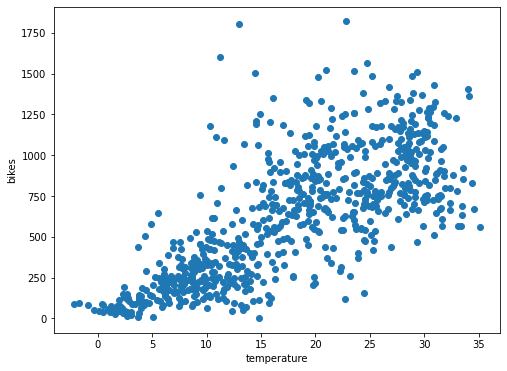

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')

In [5]:
X_temp = bikes.values[:,[1]] 
y_count = bikes.values[:,-1] 

In [29]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressorSA = DecisionTreeRegressor(max_depth=10)
regressor.fit(X_temp, y_count)
regressorSA.fit(X_temp, y_count)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [16]:
regressor.predict([[1.]])

array([189.23183761])

In [10]:
regressor.predict([[22.]])

array([769.08756039])

In [11]:
print([np.linspace(-5, 40, 10)])

[array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.])]


Text(0, 0.5, 'bikes')

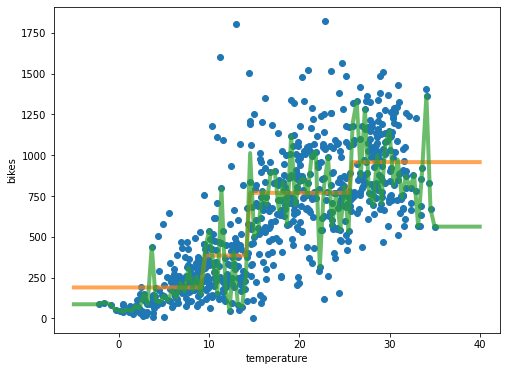

In [20]:
xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction2')
plt.plot(xx, regressorSA.predict(xx), linewidth=4, alpha=.7, label='prediction50')
plt.xlabel('temperature')
plt.ylabel('bikes')
#plt.legend()
#plt.show()

## What is the best metric to evaluate a regression performance ?

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *


print ("MSE 2 depth %.3f"% mean_squared_error(bikes['count'], regressor.predict(np.array([bikes['temperature']]).T)))
print ("MSE 30 depth %.3f"% mean_squared_error(bikes['count'], regressorSA.predict(np.array([bikes['temperature']]).T)))



MSE 2 depth 62803.790
MSE 30 depth 11534.118


In [22]:
s = cross_val_score(regressor, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

s = cross_val_score(regressorSA, np.array([bikes['temperature']]).T, bikes['count'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print ("MSE depth: 30 %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

MSE depth: 2 67932.548 (+/- 16969.45075)
MSE depth: 30 116050.134 (+/- 19718.70061)


In [ ]:
print(y_count.shape)
print(X_temp.shape)

y_est = regressor.predict(X_temp)
y_est.shape
print("mse: ", np.square(np.subtract(y_count,y_est)).mean())
print("mse: ", mean_squared_error(y_count,y_est) )

(729,)
(729, 1)
mse:  62803.789784053784
mse:  62803.789784053755


We can also visualize the resultant tree

In [30]:
from sklearn.tree import export_graphviz
export_graphviz(regressorSA, out_file='tree.dot', feature_names=['temperature'])

In [ ]:
!sudo apt-get install graphviz

In [31]:
!dot -Tpng tree.dot > tree2.png # to convert the tree in a png image

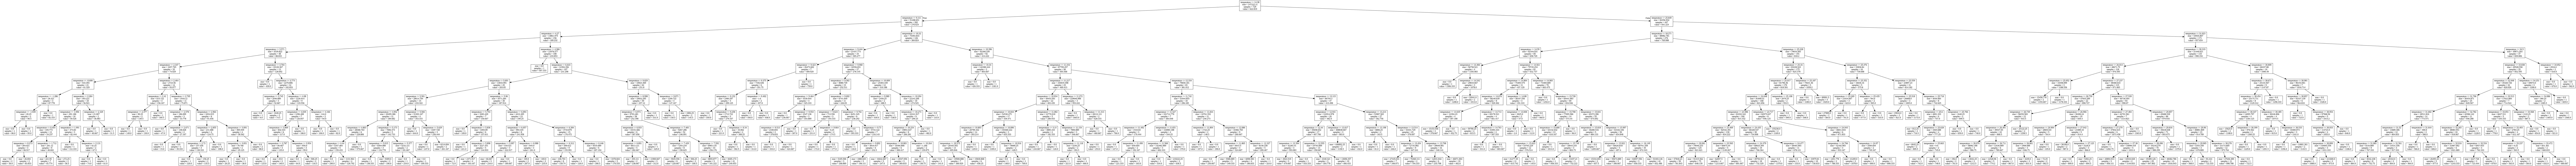

In [32]:
from IPython.display import Image
Image(filename='tree2.png') 

# Reference

[1] https://cambridgespark.com/content/tutorials/getting-started-with-regression-and-decision-trees/index.html

[2] Data: 